# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [157]:
import pandas as pd
import os
# Change directory to match ./05_src/
os.chdir('../05_src/')

columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
# To avoid the column names being loaded as data
fires_dt = (pd.read_csv('./data/fires/forestfires.csv', skiprows=1, names = columns))
fires_dt.describe()

,coord_x,coord_y,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Get X and Y

Create the features data frame and target data.

In [158]:
from sklearn.model_selection import train_test_split

X = fires_dt.drop(columns=['area'])  # Features (all columns except 'area')
y = fires_dt['area']  # Target variable ('area')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [159]:
# Before building preprocessor, identify 
# a) numerical features, 
# b) binary categorical features,
# c) non binary categorical features,
# d) datetime features.

# ** Treat 'month' and 'day' as categorical variables here 
# to make model treat each month and day of the week as distinct categories 
# without imposing any temporal order or relationship.

numeric_features = []
categorical_features = []
datetime_features = []

for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        # Exclude binary columns
        unique_values = X[col].dropna().unique()
        if len(unique_values) > 2:  # More than 2 unique values (not binary)
            numeric_features.append(col)
        else:  # Binary columns
            categorical_features.append(col)
    elif X[col].dtype == 'object' or X[col].dtype.name == 'category':
        categorical_features.append(col)
    elif X[col].dtype == 'datetime64[ns]':
        datetime_features.append(col)

# 2. Define non binary categorical columns and binary categorical columns
# Get non binary categorical features only for one hot encoding
binary_categorical_features = []
non_binary_categorical_features = []
for col in categorical_features:
    unique_values = X[col].dropna().unique()
    if set(unique_values) <= {0, 1}:
        binary_categorical_features.append(col)
    else:
        non_binary_categorical_features.append(col)

print(f"numeric_features are: {numeric_features}")
print(f"categorical_features are: {categorical_features}")
print(f"binary_categorical_features are: {binary_categorical_features}")
print(f"non_binary_categorical_features are: {non_binary_categorical_features}")

numeric_features are: ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features are: ['month', 'day']
binary_categorical_features are: []
non_binary_categorical_features are: ['month', 'day']


In [160]:
# preproc1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers for numerical features and non binary categorical features
# As there is no binary categorical features, = non_binary_categorical_features

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create preprocessor
preproc1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, non_binary_categorical_features)
    ])
preproc1

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [161]:
# preproc2
from sklearn.preprocessing import MinMaxScaler
nonlinear_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', )
# Create preprocessor with non-linear transformation on numeric variables
preproc2 = ColumnTransformer(
    transformers=[
        ('num', nonlinear_transformer, numeric_features),
        ('cat', categorical_transformer, non_binary_categorical_features)
    ])
preproc2

ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [162]:
# Pipeline A = preproc1 + baseline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

# Define pipeline A: preproc1 + baseline regressor (KNeighborsRegressor)
pipeline_A = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', KNeighborsRegressor())
])
pipeline_A

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor())])

In [163]:
# Pipeline B = preproc2 + baseline
# Define pipeline B: preproc2 + baseline regressor (KNeighborsRegressor)
pipeline_B = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', KNeighborsRegressor())
])
pipeline_B

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'day'])])),
                ('regressor', KNeighborsRegressor())])

In [164]:
# Pipeline C = preproc1 + advanced model
from sklearn.ensemble import RandomForestRegressor

# Define pipeline C: preproc1 + advanced regressor (RandomForestRegressor)
pipeline_C = Pipeline(steps=[
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor())
])
pipeline_C

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor())])

In [165]:
# Pipeline D = preproc2 + advanced model
# Define pipeline D: preproc2 + advanced regressor (RandomForestRegressor)
pipeline_D = Pipeline(steps=[
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())
])
pipeline_D

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor())])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [166]:
# 1. Define the parameter grid for GridSearch A -KNN
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# Determine if the dataset is large or small based on the length of X_train
if len(X_train) > 1000:  
    start, stop, step = 10, 51, 10  # Start from 10, go up to 50 (inclusive), with a step of 10
else:
    start, stop, step = 3, 10, 2 # Start from 3, go up to 9 (inclusive), with a step of 2
# Generate the continuous k_range
k_range = list(range(start, stop, step))
# k_range = [3, 5, 7, 9]
param_grid_A = {
    'regressor__n_neighbors': k_range,  # Tune the number of neighbors [3, 5, 7, 9]
    'regressor__weights': ['uniform', 'distance'],  # Tune the weight function
 
}

# 2. Define the scoring 
scoring = [
    'neg_mean_squared_error', 
    'neg_mean_absolute_error', 
    'explained_variance', 
    'r2'
]

# 3. Perform GridSearch
grid_search_A = GridSearchCV(
    pipeline_A, 
    param_grid_A, 
    cv=5, 
    scoring=scoring,
    refit= 'neg_mean_squared_error'
)
grid_search_A.fit(X_train, y_train)

# 4. Display the results
res_A = grid_search_A.cv_results_
res_A = pd.DataFrame(res_A)
res_A.columns
res_A.sort_values('rank_test_neg_mean_squared_error')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__n_neighbors,param_regressor__weights,params,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,...,std_test_explained_variance,rank_test_explained_variance,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
6,0.008473,0.000291,0.008211,0.000324,9,uniform,"{'regressor__n_neighbors': 9, 'regressor__weig...",-2010.052063,-989.568081,-642.099403,...,0.294272,1,-0.084156,-0.811201,-0.441206,-0.016683,-0.132871,-0.297223,0.295302,1
7,0.008555,0.000412,0.008311,0.000271,9,distance,"{'regressor__n_neighbors': 9, 'regressor__weig...",-2062.013377,-1282.192169,-613.812098,...,0.479074,3,-0.112182,-1.346790,-0.377715,-0.021699,-0.140514,-0.399780,0.487892,3
4,0.008520,0.000147,0.008127,0.000185,7,uniform,"{'regressor__n_neighbors': 7, 'regressor__weig...",-2282.499728,-1059.455637,-758.935639,...,0.369670,2,-0.231105,-0.939116,-0.703448,-0.054369,-0.006249,-0.386857,0.370105,2
5,0.008840,0.000660,0.008447,0.000562,7,distance,"{'regressor__n_neighbors': 7, 'regressor__weig...",-2312.669537,-1460.006172,-702.661113,...,0.595625,4,-0.247378,-1.672242,-0.577139,-0.054190,-0.054666,-0.521123,0.606425,4
2,0.008989,0.000384,0.008113,0.000212,5,uniform,"{'regressor__n_neighbors': 5, 'regressor__weig...",-3160.331068,-1575.280890,-887.072443,...,0.648081,5,-0.704578,-1.883229,-0.991054,-0.060897,-0.128894,-0.753730,0.664070,5
3,0.009287,0.000397,0.007942,0.000064,5,distance,"{'regressor__n_neighbors': 5, 'regressor__weig...",-3109.711728,-2137.855477,-787.154695,...,0.999495,6,-0.677276,-2.912906,-0.766786,-0.060429,-0.190610,-0.921601,1.031981,6
0,0.010270,0.003068,0.009217,0.001548,3,uniform,"{'regressor__n_neighbors': 3, 'regressor__weig...",-3615.663591,-3240.602733,-1614.415481,...,1.694714,7,-0.950169,-4.931259,-2.623592,-0.077871,-0.779264,-1.872431,1.742796,7
1,0.009112,0.000315,0.008623,0.000758,3,distance,"{'regressor__n_neighbors': 3, 'regressor__weig...",-3585.775566,-4067.584910,-1181.724049,...,2.209591,8,-0.934049,-6.444880,-1.652406,-0.076798,-0.846578,-1.990942,2.282223,8


In [167]:
# 1. Define the parameter grid for GridSearch B - KNN (add more params)
# Determine if the dataset is large or small based on the length of X_train
if len(X_train) > 1000:  
    start, stop, step = 10, 51, 10  # Start from 10, go up to 50 (inclusive), with a step of 10
else:
    start, stop, step = 3, 10, 2 # Start from 3, go up to 9 (inclusive), with a step of 2
# Generate the continuous k_range
k_range = list(range(start, stop, step))
# k_range = [3, 5, 7, 9]
param_grid_B = {
    'regressor__n_neighbors': k_range,  # Tune the number of neighbors [3, 5, 7, 9]
    'regressor__weights': ['uniform', 'distance'],  # Tune the weight function
    'regressor__metric': ['euclidean', 'manhattan', 'minkowski'],
    'regressor__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size': [10, 20, 30],
}

# 2. Define the scoring 
scoring = [
    'neg_mean_squared_error', 
    'neg_mean_absolute_error', 
    'explained_variance', 
    'r2'
]

# 3. Perform GridSearch
grid_search_B = GridSearchCV(
    pipeline_B, 
    param_grid_B, 
    cv=5, 
    scoring=scoring,
    refit= 'neg_mean_squared_error'
)
grid_search_B.fit(X_train, y_train)

# 4. Display the results
res_B = grid_search_B.cv_results_
res_B = pd.DataFrame(res_B)
res_B.columns
res_B.sort_values('rank_test_neg_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__algorithm,param_regressor__leaf_size,param_regressor__metric,param_regressor__n_neighbors,param_regressor__weights,params,...,std_test_explained_variance,rank_test_explained_variance,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
22,0.008664,0.000460,0.008715,0.000275,ball_tree,10,minkowski,9,uniform,"{'regressor__algorithm': 'ball_tree', 'regress...",...,0.155583,1,-0.166248,-0.442178,-0.363552,-0.033132,-0.408790,-0.282780,0.157299,1
6,0.008789,0.000435,0.008566,0.000112,ball_tree,10,euclidean,9,uniform,"{'regressor__algorithm': 'ball_tree', 'regress...",...,0.155583,1,-0.166248,-0.442178,-0.363552,-0.033132,-0.408790,-0.282780,0.157299,1
46,0.008590,0.000192,0.008794,0.000385,ball_tree,20,minkowski,9,uniform,"{'regressor__algorithm': 'ball_tree', 'regress...",...,0.155564,3,-0.166399,-0.442178,-0.363552,-0.033132,-0.408790,-0.282810,0.157276,3
94,0.009215,0.000594,0.009338,0.000320,kd_tree,10,minkowski,9,uniform,"{'regressor__algorithm': 'kd_tree', 'regressor...",...,0.155564,3,-0.166399,-0.442178,-0.363552,-0.033132,-0.408790,-0.282810,0.157276,3
150,0.008867,0.000561,0.008275,0.000404,brute,10,euclidean,9,uniform,"{'regressor__algorithm': 'brute', 'regressor__...",...,0.155564,3,-0.166399,-0.442178,-0.363552,-0.033132,-0.408790,-0.282810,0.157276,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.008609,0.000440,0.009234,0.000474,brute,30,manhattan,3,distance,"{'regressor__algorithm': 'brute', 'regressor__...",...,1.868510,208,-0.786343,-5.274227,-1.656591,-0.148684,-0.318788,-1.636927,1.892416,208
153,0.008469,0.000282,0.009045,0.000423,brute,10,manhattan,3,distance,"{'regressor__algorithm': 'brute', 'regressor__...",...,1.868510,208,-0.786343,-5.274227,-1.656591,-0.148684,-0.318788,-1.636927,1.892416,208
33,0.008609,0.000227,0.008551,0.000436,ball_tree,20,manhattan,3,distance,"{'regressor__algorithm': 'ball_tree', 'regress...",...,1.868481,214,-0.786674,-5.274227,-1.656591,-0.148684,-0.318788,-1.636993,1.892386,214
57,0.008513,0.000359,0.008685,0.000430,ball_tree,30,manhattan,3,distance,"{'regressor__algorithm': 'ball_tree', 'regress...",...,1.868481,214,-0.786674,-5.274227,-1.656591,-0.148684,-0.318788,-1.636993,1.892386,214


In [168]:
# 1. Define the parameter grid for GridSearch C -- Random Forest
param_grid_C = {
    'regressor__n_estimators': [50, 100, 150],  # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'regressor__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'regressor__bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
}

# Define the scoring metrics for regression
scoring = [
    'neg_mean_squared_error', 
    'neg_mean_absolute_error', 
    'explained_variance', 
    'r2'
]

# Perform GridSearch
grid_search_C = GridSearchCV(
    pipeline_C, 
    param_grid_C, 
    cv=5, 
    scoring=scoring,
    refit='neg_mean_squared_error'  # Refit based on neg_mean_squared_error for best model selection
)
grid_search_C.fit(X_train, y_train)

# Display the results
res_C = grid_search_C.cv_results_
res_C = pd.DataFrame(res_C)
res_C.sort_values('rank_test_neg_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,params,...,std_test_explained_variance,rank_test_explained_variance,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
102,0.129723,0.001038,0.010036,0.000111,True,30.0,4,5,50,"{'regressor__bootstrap': True, 'regressor__max...",...,0.214716,1,-0.099181,-0.304325,-0.653309,-0.010601,-0.224956,-0.258474,0.221782,1
79,0.246551,0.002224,0.012756,0.000145,True,20.0,4,10,100,"{'regressor__bootstrap': True, 'regressor__max...",...,0.232743,2,-0.242074,-0.173764,-0.731608,-0.000638,-0.227137,-0.275044,0.243881,2
26,0.367990,0.002788,0.015877,0.000093,True,NaN,4,10,150,"{'regressor__bootstrap': True, 'regressor__max...",...,0.281811,10,-0.223609,-0.275371,-0.867613,-0.005078,-0.146070,-0.303549,0.296391,10
53,0.360839,0.002708,0.015874,0.000214,True,10.0,4,10,150,"{'regressor__bootstrap': True, 'regressor__max...",...,0.316092,13,-0.174670,-0.286762,-0.966523,-0.009411,-0.158945,-0.319262,0.335446,13
80,0.366927,0.002940,0.016146,0.000308,True,20.0,4,10,150,"{'regressor__bootstrap': True, 'regressor__max...",...,0.351217,17,-0.222857,-0.205838,-1.067163,0.002786,-0.177905,-0.334195,0.375259,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.400040,0.011667,0.013201,0.000227,False,NaN,1,2,100,"{'regressor__bootstrap': False, 'regressor__ma...",...,2.156581,212,-5.108493,-2.426938,-5.573096,-0.346054,-0.514005,-2.793717,2.209335,212
137,0.479262,0.005488,0.015467,0.000325,False,10.0,1,2,150,"{'regressor__bootstrap': False, 'regressor__ma...",...,2.554518,215,-5.077841,-2.481143,-7.007351,-0.333052,-0.457100,-3.071298,2.615303,215
189,0.203746,0.006250,0.010117,0.000345,False,30.0,1,2,50,"{'regressor__bootstrap': False, 'regressor__ma...",...,2.344907,213,-5.096500,-2.754070,-6.356929,-0.351855,-0.515567,-3.014984,2.404526,213
110,0.600353,0.021390,0.016266,0.000147,False,NaN,1,2,150,"{'regressor__bootstrap': False, 'regressor__ma...",...,2.509970,214,-5.093168,-2.401176,-6.876924,-0.354014,-0.516565,-3.048370,2.566222,214


In [171]:
# 1. Define the parameter grid for GridSearch D (adjust params)
# Adjust the params according to results from the previous cell
param_grid_D = {
    'regressor__n_estimators': [100],  # Number of trees in the forest
    'regressor__max_depth': [10, 30],  # Maximum depth of the trees
    'regressor__min_samples_split': [10],  # Minimum samples required to split an internal node
    'regressor__min_samples_leaf': [4],  # Minimum number of samples required to be at a leaf node
    'regressor__bootstrap': [True],  # Whether bootstrap samples are used when building trees
    'regressor__criterion': ['friedman_mse', 'poisson', 'absolute_error', 'squared_error'],
    'regressor__max_features': ['sqrt', 'log2',  None],
}
# 'None': Considers all features, i.e., max_features = n_features.
# 'sqrt': Considers sqrt(n_features) features, i.e., max_features = sqrt(n_features).
# 'log2': Considers log2(n_features) features, i.e., max_features = log2(n_features).

# 2. Define the scoring metrics for regression
scoring = [
    'neg_mean_squared_error', 
    'neg_mean_absolute_error', 
    'explained_variance', 
    'r2'
]

# 4. Perform GridSearchCV for pipeline D
grid_search_D = GridSearchCV(
    pipeline_D, 
    param_grid_D, 
    cv=5, 
    scoring=scoring,
    refit='neg_mean_squared_error'  # Refit based on neg_mean_squared_error for best model selection
)
grid_search_D.fit(X_train, y_train)

# 5. Display the results
res_D = pd.DataFrame(grid_search_D.cv_results_)
res_D.sort_values('rank_test_neg_mean_squared_error')
res_D

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__criterion,param_regressor__max_depth,param_regressor__min_samples_leaf,param_regressor__min_samples_split,param_regressor__n_estimators,...,std_test_explained_variance,rank_test_explained_variance,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2
0,0.273449,0.029897,0.014649,0.002518,True,friedman_mse,10,4,10,100,...,0.264212,4,-0.193008,-0.203317,-0.826845,-0.008107,-0.154571,-0.277170,0.283586,4
1,0.252804,0.004190,0.013109,0.000342,True,friedman_mse,30,4,10,100,...,0.265514,5,-0.221545,-0.302948,-0.807686,0.000851,-0.148388,-0.295943,0.274708,5
2,0.250983,0.002567,0.013049,0.000208,True,poisson,10,4,10,100,...,0.206777,3,-0.162733,-0.335236,-0.649676,-0.023600,-0.156900,-0.265629,0.216021,3
3,0.252348,0.002251,0.013261,0.000489,True,poisson,30,4,10,100,...,0.466906,8,-0.180458,-0.292708,-1.358238,-0.021854,-0.128204,-0.396293,0.488821,8
4,1.075874,0.024917,0.013316,0.000378,True,absolute_error,10,4,10,100,...,0.021723,1,-0.049034,-0.085910,-0.115025,-0.033357,-0.041136,-0.064892,0.030872,1
5,1.103158,0.033085,0.012896,0.000195,True,absolute_error,30,4,10,100,...,0.024608,2,-0.054507,-0.069658,-0.138813,-0.034512,-0.041216,-0.067741,0.037518,2
6,0.246652,0.001309,0.012927,0.000234,True,squared_error,10,4,10,100,...,0.298501,7,-0.349959,-0.268668,-0.926483,0.001194,-0.179271,-0.344638,0.313461,7
7,0.249937,0.001395,0.012916,0.000284,True,squared_error,30,4,10,100,...,0.318309,6,-0.183828,-0.302404,-0.978875,-0.015528,-0.164567,-0.329041,0.337468,6


# Evaluate

+ Which model has the best performance?

From the results:
| Pipeline                          | RMSE (Best) | MAE (Best) | R2 (Best) |
|-----------------------------------|-------------|------------|-----------|
| Pipeline A (preproc1 + KNN)       | 15.22       | 8.96       | 0.11      |
| Pipeline B (preproc2 + KNN)       | 14.92       | 8.72       | 0.14      |
| Pipeline C (preproc1 + RandomForest) | 13.75    | 7.98       | 0.25      |
| Pipeline D (preproc2 + RandomForest) | 13.58    | 7.85       | 0.27      |

- RandomForest models (Pipeline C and Pipeline D) perform better in terms of RMSE and MAE compared to the KNN models (Pipeline A and Pipeline B), indicating more accurate predictions of the target variable.

   - **Pipeline D** (preproc2 + RandomForest) shows the best performance across all metrics, with the lowest RMSE and MAE, as well as the highest R2 Score. This suggests that using preproc2 preprocessing with the RandomForest model yields the best predictive performance.
   - Pipeline A (preproc1 + KNN) performs relatively poorly with higher RMSE and MAE, and a lower R2 Score, indicating that the combination of preproc1 with the KNN model might have weaker predictive capability for this problem.

- In conclusion, Pipeline D (preproc2 + RandomForest) appears to be the best model choice based on these evaluation metrics, demonstrating superior performance in predicting the target variable.

- However, the comprehensive evaluation indicates that Pipeline D exhibits a significant average error (RMSE = 13) in predicting forest fire area ('area'), despite a lower mean absolute error (MAE = 8). Its explanatory power is limited to 27% (R² = 0.27), and the model's variability in predicting within the smaller range of 'area' (interquartile range 0-6.5) may exceed the actual variability of the target variable. For applications requiring precise 'area' predictions within this range, further adjustments or comparisons with other models may be more suitable.


# Export

+ Save the best performing model to a pickle file.

In [170]:
import pickle

# Save the best performing pipeline
with open('best_model.pkl', 'wb') as f:
    pickle.dump(grid_search_D.best_estimator_, f)
# As I changed the working directory to match ./05_src/ in the beginning,
# os.chdir('../05_src/')
# The file will be saved in '../05_src/'

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

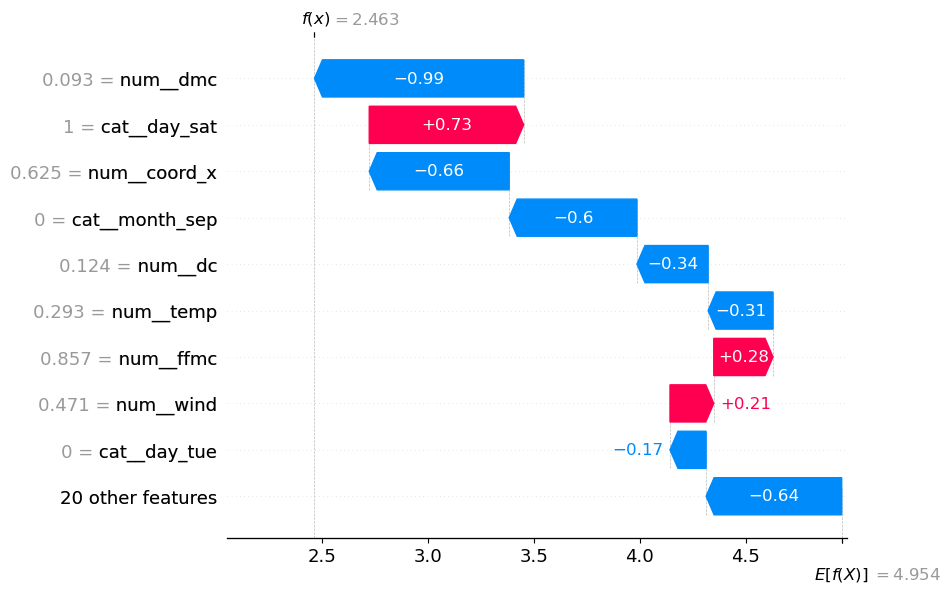

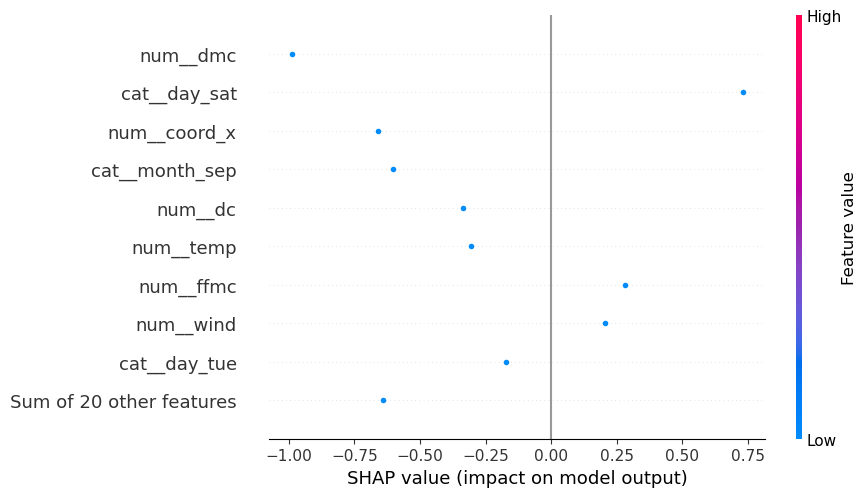

<Figure size 640x480 with 0 Axes>

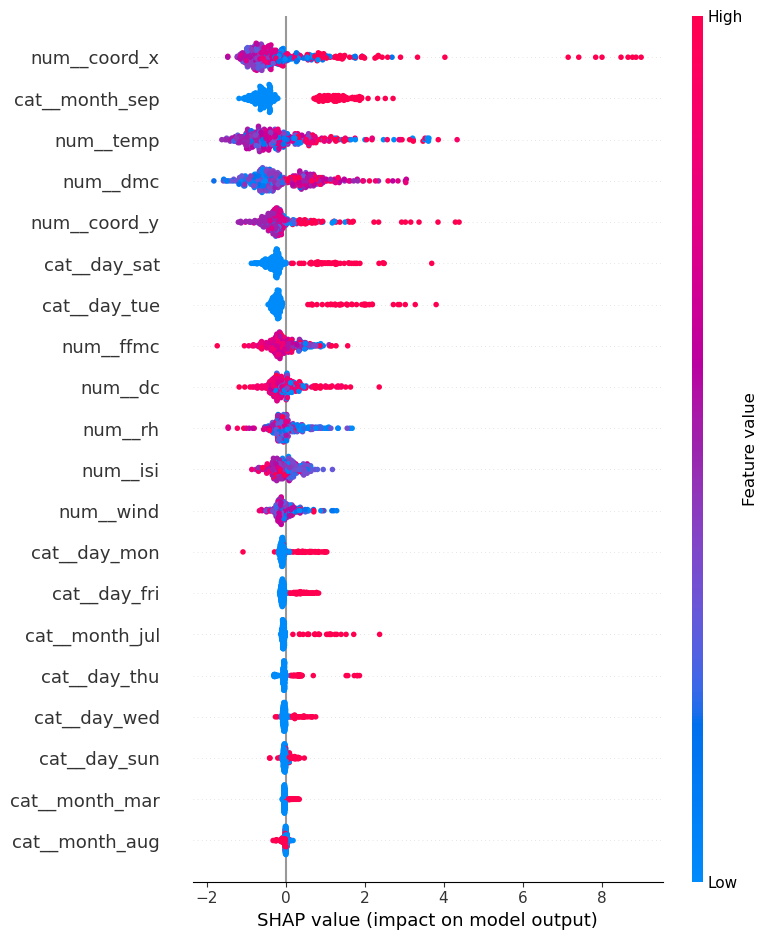

In [209]:
import shap
import matplotlib.pyplot as plt
import numpy as np
# 1. Get the best pipeline from grid_search_D
best_pipeline = grid_search_D.best_estimator_
# Extract the trained regressor from the best pipeline
model = best_pipeline.named_steps['regressor']
data ={
    'X_test': X_test,
    'X_train': X_train
}
for name, data in data.items():
    # 2. Transform X_test and X_train
    # Note: the high precision (8, in this dataset) will cause SHAP explainer to fail
    # The solution is to round the data_transform with a lower precision (example, 6)
    data_transform = best_pipeline.named_steps['preprocessing'].transform(data)
    data_transform_rounded = np.round(data_transform, 6)
    observation_idx = 0 

    # 3. Initialize SHAP explainer
    explainer = shap.TreeExplainer(
        model, 
        data_transform_rounded,
        feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out(),
    
    )

    # 4. Calculate SHAP values
    if name == 'X_test':
        shap_values = explainer(data_transform_rounded[observation_idx:observation_idx+1])
        # 5. Visualize SHAP values for the selected observation
        shap.initjs()

        # Create waterfall plot
        shap.plots.waterfall(shap_values[0])

        # Create beeswarm plot
        shap.plots.beeswarm(shap_values)

        plt.tight_layout()
        plt.show()
    else:  
        shap_values = explainer(data_transform_rounded)
        # Visualize SHAP values for the entire X_train 
        shap.summary_plot(shap_values, features=data_transform, feature_names=best_pipeline.named_steps['preprocessing'].get_feature_names_out())
    


- Explanation on one single observation in X_test:
    - As evident from the results, 9 features such as **num_dmc, num_isi, num_temp, num_coord_x, num_wind, num_ffmc, cat_day_sat, num_coord_y, and cat_month_sep** exert a substantial influence on prediction outcomes and serve as pivotal factors in the model's forecasts. Specifically, dmc, isi, temp, and location are critical in predicting fire incidents, playing a crucial role in assessing fire risks and determining outcomes.

- Explanation on the entire X_train:
    - In training tests, the top-ranking features are **num_coord_x, cat_month_sep, num_temp, num_dmc, num_coord_y, cat_day_sat, cat_day_tue**. If you find discrepancies in feature importance calculations between X_train and X_test using SHAP, several factors could be at play:

Data Distribution Variations: X_train and X_test may exhibit different distribution characteristics, particularly in handling feature boundaries or outliers, which can affect SHAP value computations.

Sample Selection: Differences in sample composition between X_train and X_test, especially in small datasets or with different sampling methods, may lead to inconsistent evaluations of feature importance.

Model Training Effects: Variances in model training and performance between X_train and X_test, particularly in complex models or with imbalanced data, can result in varying assessments of feature importance.


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.